In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pyreadstat

In [14]:
file_path = ".\\BASEDATOS_ARGENTINA_122_ .sav"

In [44]:
df_diputados, meta = pyreadstat.read_sav(file_path)
df = df_diputados
type(df)

pandas.core.frame.DataFrame

# Análisis Exploratorio

#### Explicación del dataset:

In [36]:
df.head(5)

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,...,pcontacto2,pcontacto3,resultado1,resultado107,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
0,4.0,1.0,2022.0,20.0,12.0,2.0,7.0,16.0,31.0,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
1,6.0,1.0,2022.0,7.0,2.0,2.0,2.0,3.0,15.0,25.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
2,10.0,1.0,2022.0,2.0,15.0,2.0,1.0,2.0,3.0,4.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
3,11.0,1.0,2022.0,7.0,2.0,2.0,5.0,15.0,27.0,35.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
4,12.0,1.0,2022.0,29.0,9.0,2.0,37.0,38.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.096378


In [46]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 111 filas y 266 columnas


In [26]:
df.dtypes

Encuestado    float64
País          float64
legis         float64
partido       float64
departa       float64
               ...   
resultado2    float64
causaneg2     float64
resultado3    float64
causaneg3     float64
peso          float64
Length: 266, dtype: object

# Hipótesis 1:
#### Existe una relación entre el posicionamiento ideológico de los diputados y el grado de importancia que le asignan a la inseguridad: 
 
- Aquellos diputados posicionados más a la derecha perciben la inseguridad como un problema más importante que aquellos situados a la izquierda.

In [28]:
#Var Independiente: 
#ID101: Posicionamiento Izq - Der de diputados: En una escala donde 1 es la Izquierda y 10 es la Derecha
df["ID101"].unique()

array([ 5.,  7.,  3.,  9.,  1.,  6.,  2.,  4., 99.,  8.])

In [48]:
#Eliminar categorías residuales
df_hip1 = df[(df['ID101'] != 98) & (df['ID101'] != 99)] #Elimino valores de 98 (NS) y 99 (NC) de la variable
df_hip1["ID101"].unique() # Observacion: ningun diputado se coloca en el extremo de la derecha (10) pero sí en el extremo de la izq (1)

array([5., 7., 3., 9., 1., 6., 2., 4., 8.])

In [70]:
df_hip1.shape #Se elimina una fila (Un diputado) del dataset

(110, 266)

In [72]:
# Var Dependiente
# PRO102:  Qué grado de importancia tiene hoy en Argentina la INSEGURIDAD como problema en la Arg, siguiendo una escala de 1 a 10, donde 1 significa "no es unacuestión importante" y el 10 "es una cuestión muy importante"?
df_hip1["PRO102"].unique() 

array([ 7.,  9., 10.,  3.,  8.,  4.,  5.,  6.])

In [74]:
df_hip1[["ID101", "PRO102"]].isna().sum() #No hay nulos

ID101     0
PRO102    0
dtype: int64

### Análisis Gráfico

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

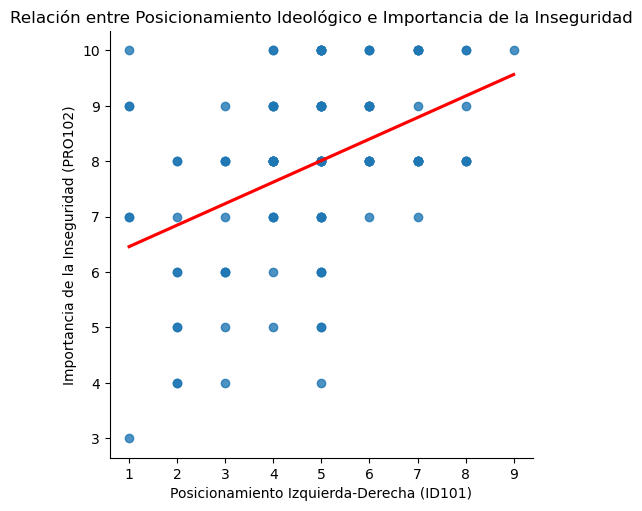

In [92]:
# Scatterplot con línea de regresión
sns.lmplot(x="ID101", y="PRO102", data=df_hip1, ci=None, line_kws={'color': 'red'})
plt.xlabel("Posicionamiento Izquierda-Derecha (ID101)")
plt.ylabel("Importancia de la Inseguridad (PRO102)")
plt.title("Relación entre Posicionamiento Ideológico e Importancia de la Inseguridad")
plt.show()

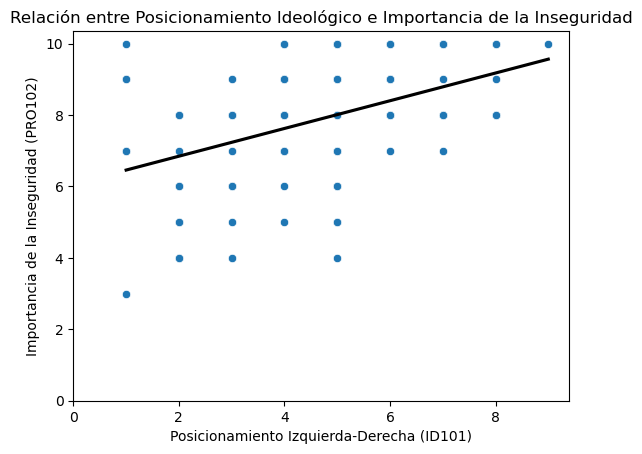

In [133]:
# Scatterplot con línea de regresión
sns.scatterplot(x="ID101", y="PRO102", data=df_hip1)
sns.regplot(x="ID101", y="PRO102", data=df_hip1, ci=None, scatter=False, line_kws={'color': 'black'}) #insertar recta de regresión
plt.xlabel("Posicionamiento Izquierda-Derecha (ID101)")
plt.ylabel("Importancia de la Inseguridad (PRO102)")
plt.title("Relación entre Posicionamiento Ideológico e Importancia de la Inseguridad")
plt.xlim(0, None) #Empezar ejes en 0 
plt.ylim(0, None) 
plt.show()

### Correlación de Pearson

In [116]:
#Correalción 
corr = df_hip1["ID101"].corr(df_hip1["PRO102"])
print(f'Correlación de Pearson: {corr:.2f}')

Correlación de Pearson: 0.44


### Reegresión Lineal

In [118]:
#Regresión Lineal Posicionamiento Político - Importancia de la Inseguridad como problema
# Paso 3: Ajustar el modelo de regresión lineal
x = sm.add_constant(df_hip1["ID101"])
y = df_hip1["PRO102"]

modelo_1 = sm.OLS(y, x).fit()

# Mostrar el resumen del modelo
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRO102   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.67e-06
Time:                        16:30:04   Log-Likelihood:                -198.68
No. Observations:                 110   AIC:                             401.4
Df Residuals:                     108   BIC:                             406.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0710      0.393     15.461      0.0

### Resultados:

-
-

# Hipótesis 2:
#### ...: 
 
- ....